In [1]:
import cv2 as cv
import os
import pandas as pd
import numpy as np

In [2]:
dataset=[]
folder_paths=['/Users/hp/Desktop/internship/gender/Train/female',
              '/Users/hp/Desktop/internship/gender/Train/male']
for i in folder_paths:
    folder_name=os.path.basename(i)
    for file_name in os.listdir(i):
        img_path=os.path.join(i,file_name)
        if os.path.isfile(img_path):
            img=cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                resize_img=cv.resize(img,(150,150))
                flattened_img=resize_img.flatten().tolist()
                dataset.append(flattened_img+[folder_name])



In [3]:
df = pd.DataFrame(dataset)

In [4]:
df.rename(columns={df.iloc[:,-1].name:'Target'},inplace=True)


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,42,40,36,33,30,33,35,32,28,23,...,1,4,8,14,19,21,22,19,17,female
1,53,54,57,56,52,52,57,61,65,64,...,106,104,102,99,96,93,90,86,85,female
2,12,12,11,9,7,8,9,11,14,15,...,44,53,60,51,44,48,49,44,41,female
3,144,147,153,152,155,163,176,192,194,192,...,25,25,30,35,38,38,38,36,35,female
4,35,28,20,14,12,10,3,4,10,17,...,108,98,91,93,99,102,97,99,102,female


**Randomize the Data**

In [6]:
#get num of rows of dataset
num_rows=len(df)
#generate permutated indices
permuted_indices=np.random.permutation(num_rows)
#generate random data
random_df=df.iloc[permuted_indices]

**Encoding the label**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
x=random_df.drop('Target',axis=1)
x=x/255
x.head()

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
3092,0.137255,0.137255,0.137255,0.133333,0.125490,0.125490,0.129412,0.129412,0.133333,0.121569,...,0.827451,0.827451,0.835294,0.847059,0.858824,0.866667,0.878431,0.886275,0.901961,0.909804
2985,0.196078,0.164706,0.121569,0.129412,0.152941,0.203922,0.207843,0.188235,0.180392,0.168627,...,0.658824,0.658824,0.658824,0.654902,0.654902,0.658824,0.654902,0.647059,0.643137,0.643137
3303,0.949020,0.949020,0.949020,0.956863,0.913725,0.756863,0.501961,0.184314,0.188235,0.211765,...,0.047059,0.043137,0.043137,0.039216,0.035294,0.031373,0.027451,0.027451,0.027451,0.027451
3035,0.200000,0.200000,0.203922,0.176471,0.125490,0.121569,0.137255,0.137255,0.129412,0.156863,...,0.278431,0.262745,0.388235,0.462745,0.423529,0.443137,0.556863,0.596078,0.529412,0.494118
1322,0.137255,0.125490,0.109804,0.094118,0.082353,0.086275,0.094118,0.101961,0.109804,0.109804,...,0.666667,0.631373,0.592157,0.552941,0.517647,0.482353,0.474510,0.466667,0.470588,0.474510


In [9]:
encoder=LabelEncoder()
y=random_df.Target
y_encoded=encoder.fit_transform(y)
y_series=pd.Series(y_encoded,name='target')


In [10]:
df_encoded=pd.concat([x,y_series],axis=1)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,target
3092,0.137255,0.137255,0.137255,0.133333,0.125490,0.125490,0.129412,0.129412,0.133333,0.121569,...,0.827451,0.835294,0.847059,0.858824,0.866667,0.878431,0.886275,0.901961,0.909804,0
2985,0.196078,0.164706,0.121569,0.129412,0.152941,0.203922,0.207843,0.188235,0.180392,0.168627,...,0.658824,0.658824,0.654902,0.654902,0.658824,0.654902,0.647059,0.643137,0.643137,0
3303,0.949020,0.949020,0.949020,0.956863,0.913725,0.756863,0.501961,0.184314,0.188235,0.211765,...,0.043137,0.043137,0.039216,0.035294,0.031373,0.027451,0.027451,0.027451,0.027451,0
3035,0.200000,0.200000,0.203922,0.176471,0.125490,0.121569,0.137255,0.137255,0.129412,0.156863,...,0.262745,0.388235,0.462745,0.423529,0.443137,0.556863,0.596078,0.529412,0.494118,1
1322,0.137255,0.125490,0.109804,0.094118,0.082353,0.086275,0.094118,0.101961,0.109804,0.109804,...,0.631373,0.592157,0.552941,0.517647,0.482353,0.474510,0.466667,0.470588,0.474510,0


## **Classification Using SVM **

In [11]:
from sklearn.svm import SVC
model_svc=SVC()

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)


**Fitting the Model On Training data**

In [13]:
model_svc.fit(x_train,y_train);

**Model Evaluation**

In [49]:
y_pred_svc=model_svc.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

Accuracy: 0.8383404864091559
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       350
           1       0.85      0.83      0.84       349

    accuracy                           0.84       699
   macro avg       0.84      0.84      0.84       699
weighted avg       0.84      0.84      0.84       699



<Axes: >

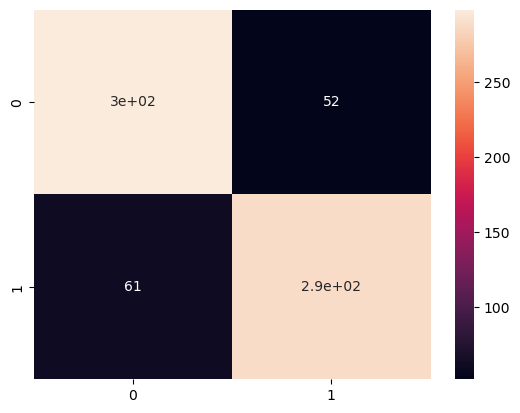

In [51]:
Accuracy_svc=accuracy_score(y_pred_svc,y_test)
print('Accuracy:',Accuracy_svc)
CR=classification_report(y_pred_svc,y_test)
print('Classification Report\n',CR)
cm=confusion_matrix(y_pred_svc,y_test)
sns.heatmap(cm,annot=True)

**Deployment**

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'male')

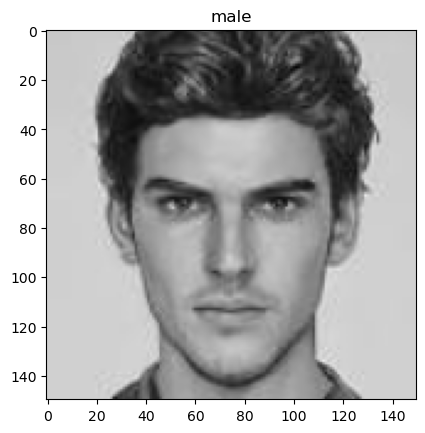

In [21]:
image_path = "/Users/hp/Desktop/internship/image_check.jpg"
user_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Resize the image to match the input size expected by the model
resized_image = cv.resize(user_image, (150, 150))

# Flatten the image
flattened_img = resized_image.flatten()

# Normalize the flattened image data
normalized_user_image = flattened_img / 255.0

# Convert the normalized flattened image to a NumPy array and reshape it
user_input = normalized_user_image.reshape(1, -1)

# Make a prediction using the trained model
user_prediction = model_svc.predict(user_input)
image=cv.cvtColor(resized_image,cv.COLOR_BGR2RGB)
# Decode the predicted label
predicted_class = encoder.inverse_transform(user_prediction)[0]
plt.imshow(image)
plt.title(predicted_class)

# **Classification using Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model_log=LogisticRegression()

In [24]:
model_log.fit(x_train,y_train);

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Evaluation**

In [52]:
y_pred_log=model_log.predict(x_test)

Accuracy Score is : 0.8125894134477826
Classification report:               precision    recall  f1-score   support

           0       0.82      0.81      0.82       364
           1       0.80      0.81      0.81       335

    accuracy                           0.81       699
   macro avg       0.81      0.81      0.81       699
weighted avg       0.81      0.81      0.81       699



<Axes: >

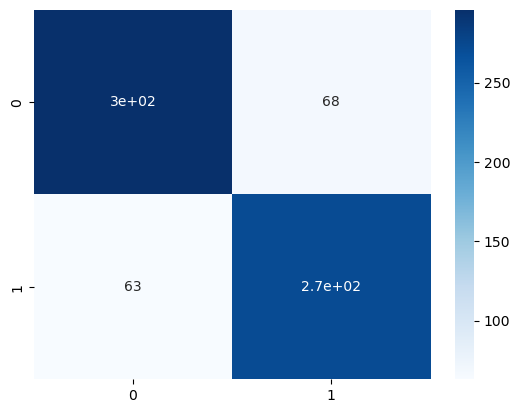

In [53]:
accuracy_log=accuracy_score(y_pred_log,y_test)
print("Accuracy Score is :",accuracy_log)
C_report=classification_report(y_pred_log,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred_log,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

**Testing our model by giving a random input image**

Text(0.5, 1.0, 'female')

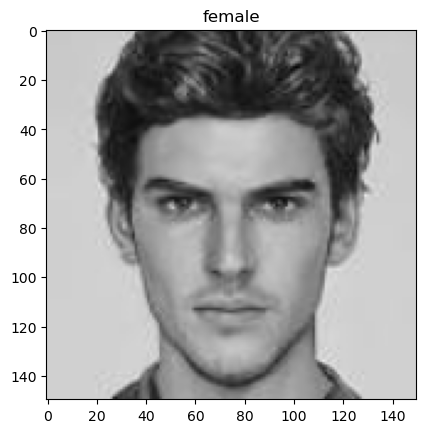

In [54]:
image_path="/Users/hp/Desktop/internship/image_check.jpg"
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=model_log.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)


# **Classification Using Random Forest **

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
Rf_model=RandomForestClassifier(n_estimators=100)

In [30]:
Rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred_rf=Rf_model.predict(x_test)

Accuracy Score is : 0.8097281831187411
Classification report:               precision    recall  f1-score   support

           0       0.81      0.82      0.81       352
           1       0.81      0.80      0.81       347

    accuracy                           0.81       699
   macro avg       0.81      0.81      0.81       699
weighted avg       0.81      0.81      0.81       699



<Axes: >

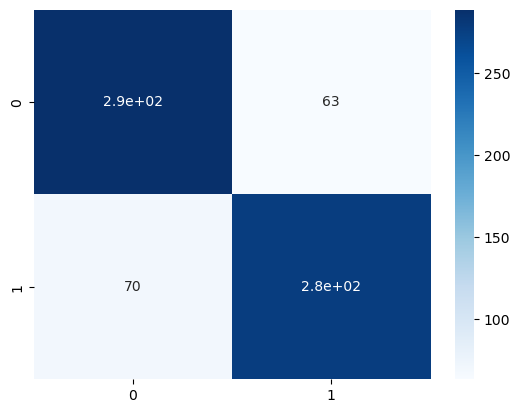

In [56]:
accuracy_rf=accuracy_score(y_pred_rf,y_test)
print("Accuracy Score is :",accuracy_rf)
C_report=classification_report(y_pred_rf,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred_rf,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

 **Testing our model by giving a random input image**



Text(0.5, 1.0, 'female')

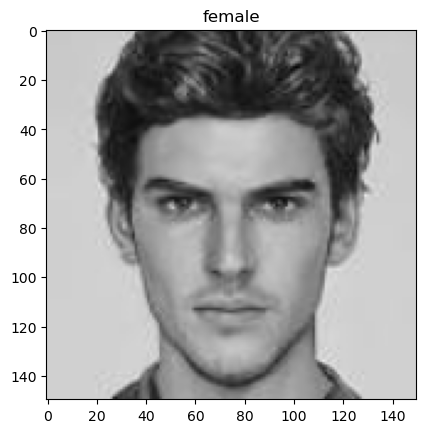

In [57]:
image_path="/Users/hp/Desktop/internship/image_check.jpg"
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=Rf_model.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)


**Saving model**

## **Classification Using Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree


In [36]:
model_dt=DecisionTreeClassifier(splitter='random')

In [37]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

In [59]:
y_pred_dt=model_dt.predict(x_test)

Accuracy Score is : 0.6866952789699571
Classification report:               precision    recall  f1-score   support

           0       0.70      0.69      0.70       360
           1       0.68      0.68      0.68       339

    accuracy                           0.69       699
   macro avg       0.69      0.69      0.69       699
weighted avg       0.69      0.69      0.69       699



<Axes: >

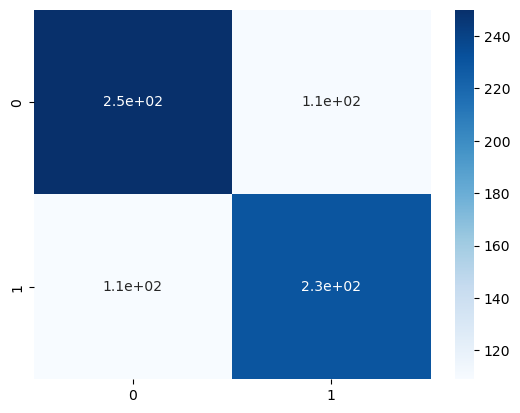

In [60]:
accuracy_dt=accuracy_score(y_pred_dt,y_test)
print("Accuracy Score is :",accuracy_dt)
C_report=classification_report(y_pred_dt,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred_dt,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

**Testing our model by giving a random input image**

Text(0.5, 1.0, 'female')

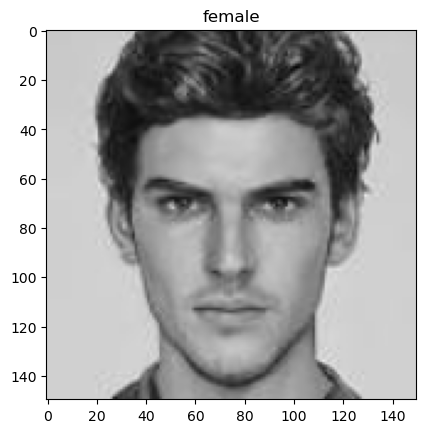

In [61]:
image_path="/Users/hp/Desktop/internship/image_check.jpg"
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=model_dt.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)

**Classification Using KNN**

In [41]:
 from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_KNN=KNeighborsClassifier()

In [43]:
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred_knn=model_KNN.predict(np.array(x_test))

Accuracy Score is : 0.7367668097281831
Classification report:               precision    recall  f1-score   support

           0       0.67      0.78      0.72       309
           1       0.80      0.70      0.75       390

    accuracy                           0.74       699
   macro avg       0.74      0.74      0.74       699
weighted avg       0.75      0.74      0.74       699



<Axes: >

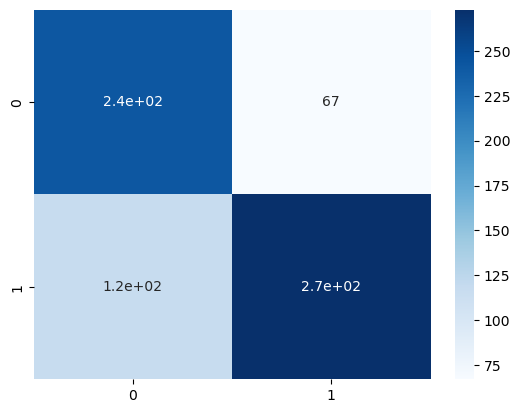

In [62]:
accuracy_knn=accuracy_score(y_pred_knn,y_test)
print("Accuracy Score is :",accuracy_knn)
C_report=classification_report(y_pred_knn,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred_knn,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

**Testing our model by giving a random input image**

Text(0.5, 1.0, 'male')

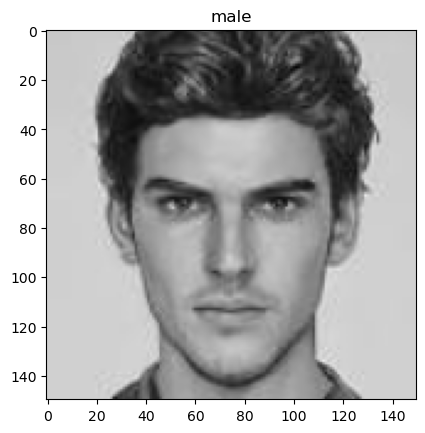

In [63]:
image_path="/Users/hp/Desktop/internship/image_check.jpg"
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=model_KNN.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)

**Comparison of Different models performance**

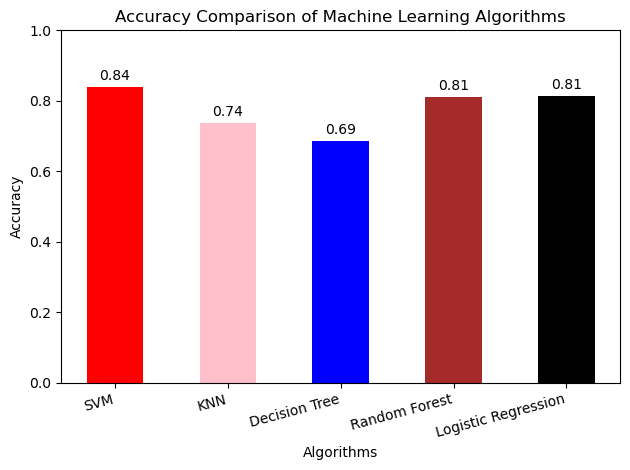

In [67]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
accuracy = [Accuracy_svc, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_log]

colors = ['red', 'pink', 'blue', 'brown', 'black']
bar_width = 0.5  # Width of the bars
bar_positions = range(len(algorithms))

plt.bar(bar_positions, accuracy, color=colors, width=bar_width)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Algorithms')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1

# Annotate each bar with its accuracy value
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')

# Adjust x-axis labels and positions
plt.xticks(bar_positions, algorithms, rotation=15, ha='right')

plt.tight_layout()  # To prevent labels from being cut off
plt.show()

****

# **Conclusion**

**In conclusion the SVm was the best at making predictions with a  accuracy of 84%. The random forest and Logistic Regression models did well too, with accuracies of 81% for both. KNN was decent with 74% accuracy, but the Decision Tree model didn't perform as well, only achieving 69%. This information helps us choose the right model for different jobs where we need predictions. also the machine learning approach is very time taking. Logistic regression, Random Forest and Decision tree give wrong prediction while deploying this is due to these models underfit **